## ERDAP with erddapy example for ENGR Ice Prawler - 2019 Test

__pyversion__==3.7   
__author__==S.Bell

In [28]:
import datetime
print("Last run {0}".format(datetime.datetime.now()))

Last run 2019-08-20 15:02:31.797354


### connecting and basic information

In [29]:
import warnings
#remove the numpy/pandas/cython warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed,")

from erddapy import ERDDAP
import pandas as pd
import numpy as np

server_url = 'http://heron.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

In [30]:
df = pd.read_csv(e.get_search_url(response='csv', search_for='PRAWLER'))

In [31]:
'We have {} tabledap, {} griddap, and {} wms endpoints.'.format(
    len(set(df['tabledap'].dropna())),
    len(set(df['griddap'].dropna())),
    len(set(df['wms'].dropna()))
)

'We have 8 tabledap, 0 griddap, and 0 wms endpoints.'

In [32]:
prawlers = df['Dataset ID'].values
print(prawlers)

['FCOM0001_PRAWE_0001' 'FCOM0001_PRAWC_0001' 'TELO9999_PRAWE_0002'
 'TELO9999_PRAWC_0002' 'TELOF001_PRAWE_F001' 'TELOF001_PRAWC_F001'
 'TELON001_PRAWE_N001' 'TELON001_PRAWC_N001']


In [33]:
variables = [e.get_var_by_attr(dataset_id=prawler, standard_name=lambda v: v is not None) for prawler in prawlers]
print(variables)

[['time', 'ETimer', 'SRate', 'IRate', 'Depth'], ['wetlab_FDOM', 'Optode_Dissolved_O2', 'wetlab_Chlorophyll', 'Optode_Temp', 'SB_Conductivity', 'time', 'SB_Temp', 'SB_Depth'], ['time', 'ETimer', 'SRate', 'IRate', 'Depth'], ['wetlab_FDOM', 'Optode_Dissolved_O2', 'wetlab_Chlorophyll', 'Epoch_Time', 'Optode_Temp', 'SB_Conductivity', 'time', 'SB_Temp', 'SB_Depth'], ['time', 'ETimer', 'SRate', 'IRate', 'Depth'], ['wetlab_FDOM', 'Optode_Dissolved_O2', 'wetlab_Chlorophyll', 'Epoch_Time', 'Optode_Temp', 'SB_Conductivity', 'time', 'SB_Temp', 'SB_Depth'], ['time', 'ETimer', 'SRate', 'IRate', 'Depth'], ['wetlab_FDOM', 'Optode_Dissolved_O2', 'wetlab_Chlorophyll', 'Epoch_Time', 'Optode_Temp', 'SB_Conductivity', 'time', 'SB_Temp', 'SB_Depth']]


### retrieving and plotting data

In [34]:
d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )

d.dataset_id='TELOF001_PRAWC_F001'

d.variables =  [
 'SB_Depth',
 'SB_Temp',
 'SB_Conductivity',
 'wetlab_Chlorophyll',
 'wetlab_FDOM',
 'Optode_Temp',
 "time",
 'Optode_Dissolved_O2'
]

d.constraints = {
    'time>=': '2019-01-01T00:00:00Z',
    'time<=': '2019-08-01T00:00:00Z',
}

In [35]:
d.get_download_url()

'http://heron.pmel.noaa.gov:8080/erddap/tabledap/TELOF001_PRAWC_F001.csv?SB_Depth,SB_Temp,SB_Conductivity,wetlab_Chlorophyll,wetlab_FDOM,Optode_Temp,time,Optode_Dissolved_O2&time>=1546300800.0&time<=1564617600.0'

In [36]:
df = d.to_pandas(
    index_col='time (UTC)',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
).dropna()

df.head()

,SB_Depth (meters),SB_Temp (degree C),SB_Conductivity (S/m),wetlab_Chlorophyll (counts),wetlab_FDOM (counts),Optode_Temp (degree C),Optode_Dissolved_O2 (\u00b5mol/L)
time (UTC),,,,,,,
2019-06-10 20:12:15+00:00,3.79,22.818,0.0,0.0,0.0,19.940,273.19
2019-06-10 20:12:23+00:00,4.92,22.818,0.0,0.0,0.0,19.933,273.22
2019-06-10 20:12:31+00:00,7.75,22.817,0.0,0.0,0.0,19.921,273.40
2019-06-10 20:12:39+00:00,8.22,22.818,0.0,0.0,0.0,19.931,273.29
2019-06-10 20:12:47+00:00,11.64,22.818,0.0,0.0,0.0,19.922,273.38


In [37]:
df.tail()

,SB_Depth (meters),SB_Temp (degree C),SB_Conductivity (S/m),wetlab_Chlorophyll (counts),wetlab_FDOM (counts),Optode_Temp (degree C),Optode_Dissolved_O2 (\u00b5mol/L)
time (UTC),,,,,,,
2019-06-21 14:28:13+00:00,23.64,11.432,3.412,76.0,51.0,11.507,317.76
2019-06-21 14:28:21+00:00,25.74,11.369,3.409,79.0,51.0,11.440,312.40
2019-06-21 14:28:29+00:00,27.86,11.321,3.405,22.0,51.0,11.368,307.55
2019-06-21 14:28:37+00:00,29.81,11.304,3.404,86.0,53.0,11.343,302.85
2019-06-21 14:28:45+00:00,30.95,11.320,3.406,74.0,51.0,11.353,298.79


#### Temperature

In [38]:
#qc
df['SB_Temp (degree C)'][df['SB_Temp (degree C)']>20]=np.nan

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean

In [40]:
import matplotlib as mpl

### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

Text(0, 0.5, 'Depth (m)')

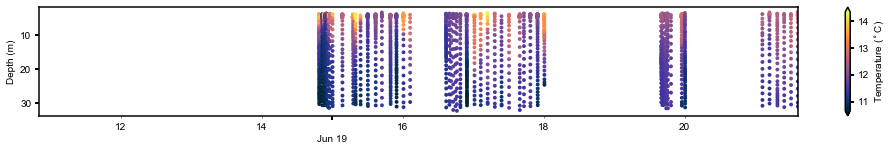

In [41]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['SB_Temp (degree C)'], marker='o', edgecolor='none', cmap=cmocean.cm.thermal)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')

In [42]:
print("""
max temp: {0:0.4}
min temp: {1:0.4}""".format(df['SB_Temp (degree C)'].max(), df['SB_Temp (degree C)'].min()))


max temp: 14.35
min temp: 10.65


#### Conductivity

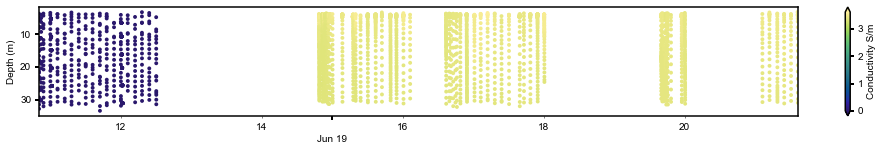

In [43]:
#plot
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['SB_Conductivity (S/m)'], marker='o', edgecolor='none', cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Conductivity S/m')
ax.set_ylabel('Depth (m)');

In [44]:
print("""
max cond: {0:0.4}
min cond: {1:0.4}""".format(df['SB_Conductivity (S/m)'].max(), df['SB_Conductivity (S/m)'].min()))



max cond: 3.614
min cond: 0.0


#### Salinity

In [45]:
import seawater as sw
#https://salinometry.com/pss-78/ for ratio
df['Salinity (PSU)'] = sw.salt(r=df['SB_Conductivity (S/m)']*10/42.914,
                               t=df['SB_Temp (degree C)'],
                               p=df['SB_Depth (meters)'])



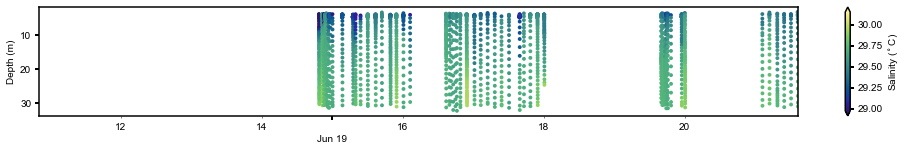

In [46]:
#bounds
lower = df['Salinity (PSU)'].mean()-3*df['Salinity (PSU)'].std()
upper = df['Salinity (PSU)'].mean()+3*df['Salinity (PSU)'].std()

#plot
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['Salinity (PSU)'], marker='o', edgecolor='none', vmin=lower, vmax=upper, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity ($^\circ$C)')
ax.set_ylabel('Depth (m)');

In [47]:
print("""
max sal: {0:0.4}
min sal: {1:0.4}""".format(df['Salinity (PSU)'].max(), df['Salinity (PSU)'].min()))

print("""
mean sal: {0:0.4}
sal std: {1:04}""".format(df['Salinity (PSU)'].mean(),df['Salinity (PSU)'].std()))


max sal: 29.97
min sal: 28.39

mean sal: 29.56
sal std: 0.19623678089394472


#### Chlorophyl

Text(0, 0.5, 'Depth (m)')

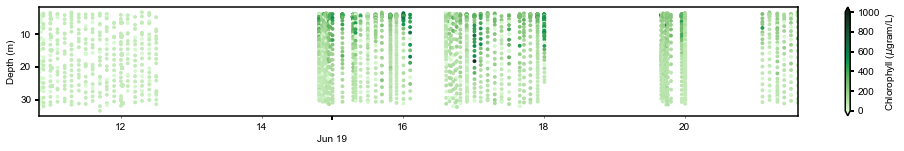

In [48]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['wetlab_Chlorophyll (counts)'], marker='o', edgecolor='none', vmin=0, vmax=1000, cmap=cmocean.cm.algae)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
#ax.set_xlim(datetime.datetime(2018,5,25),datetime.datetime.today())
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/L)')
ax.set_ylabel('Depth (m)')


In [50]:
print("""
max chlorophyll: {0:0.4}
min chlorophyll: {1:0.4}""".format(df['wetlab_Chlorophyll (counts)'].max(), 
                                   df['wetlab_Chlorophyll (counts)'].min()))



max chlorophyll: 960.0
min chlorophyll: 0.0


#### Chlorophyl (log scale)

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Depth (m)')

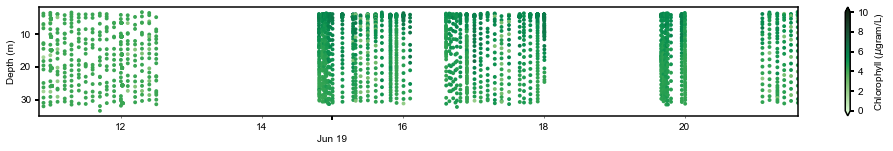

In [51]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=np.log(df['wetlab_Chlorophyll (counts)']), marker='o', edgecolor='none', vmin=0, vmax=10, cmap=cmocean.cm.algae)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
#ax.set_xlim(datetime.datetime(2018,5,25),datetime.datetime.today())
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll ($\mu$gram/L)')
ax.set_ylabel('Depth (m)')

#### Turb?

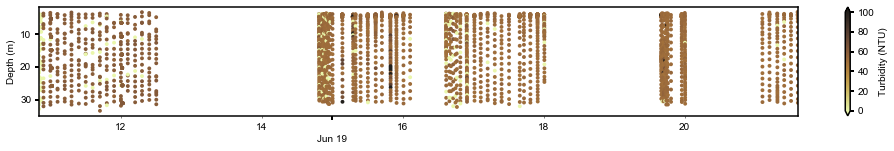

In [52]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['wetlab_FDOM (counts)'], marker='o', edgecolor='none', vmin=0, vmax=100, cmap=cmocean.cm.turbid)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Turbidity (NTU)')
ax.set_ylabel('Depth (m)');

In [53]:
import seawater as sw
sigmat = sw.dens(s=df['Salinity (PSU)'],
                 t=df['SB_Temp (degree C)'],
                 p=df['SB_Depth (meters)']) - 1000.

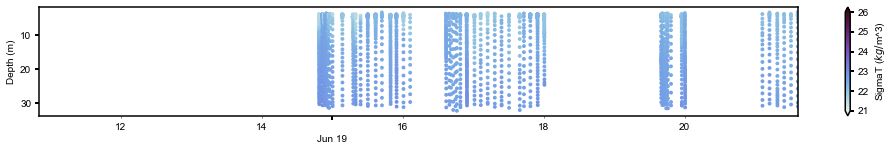

In [54]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=sigmat, marker='o', edgecolor='none', vmin=21, vmax=26, cmap=cmocean.cm.dense)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('SigmaT ($kg/$m^3)')
ax.set_ylabel('Depth (m)');

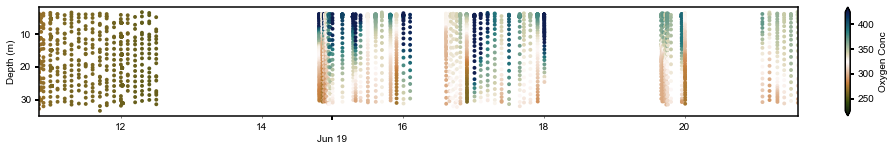

In [55]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['SB_Depth (meters)'], s=15, c=df['Optode_Dissolved_O2 (\\u00b5mol/L)'], marker='o', vmin=225, vmax=425, edgecolor='none', cmap=cmocean.cm.tarn)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=[30,15]))
ax.xaxis.set_minor_locator(DayLocator(range(0,32,2)))
ax.xaxis.set_minor_formatter(DateFormatter('%d'))
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.xaxis.set_tick_params(which='major', pad=15)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Conc')
ax.set_ylabel('Depth (m)');